# 15 総合演習問題の解答例

## 総合演習問題6問

In [2]:
# 以下は必要なモジュールのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

## 15.1 総合演習問題
キーワード：教師あり学習、画像認識、複数カテゴリーの分類、混同行列

sklearnモジュールに入っているload_digitsを以下のようにして読み込み、各数字(0〜9)を予測するモデルを構築しましょう。このデータは、手書きの数字で、0から9までのテジタルデータです。数字のラベルがdigits.targetで、そのデータの特徴量はdigits.dataになります。その時にテストデータと学習データに分けて、モデルを構築し、混同行列の結果を表示させてください(train_test_splitのパラメータrandom_state=0で設定してください)。いくつかモデルを作成し、比較してみてください。どのモデルを使いますか。

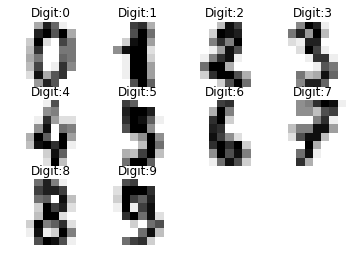

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 分析対象データ
from sklearn.datasets import load_digits

digits = load_digits()

# 画像の表示
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(3,4,label+1)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Digit:{0}'.format(label))

### **解答例**

In [2]:
# 解答
# データの分割（学習データとテストデータ分ける）
from sklearn.model_selection import train_test_split

# 混同行列
from sklearn.metrics import confusion_matrix

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# 分析対象データ
from sklearn.datasets import load_digits
digits = load_digits()

# 説明変数
X = digits.data
# 目的変数
Y = digits.target

# 学習データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

上記は、必要なモジュールやデータを読み込み、いつもと同じように、学習データとテストデータに分けています。

以下では、その学習データとテストデータがそれぞれの数字でいくつあるかカウントしており、大きな偏りはないようです。

In [10]:
# データがアンバランスに分かれていないか確認
# train
print("train:",pd.DataFrame(y_train,columns=["label"]).groupby("label")["label"].count())

# test
print("test:",pd.DataFrame(y_test,columns=["label"]).groupby("label")["label"].count())

train: label
0    141
1    139
2    133
3    138
4    143
5    134
6    129
7    131
8    126
9    133
Name: label, dtype: int64
test: label
0    37
1    43
2    44
3    45
4    38
5    48
6    52
7    48
8    48
9    47
Name: label, dtype: int64


それでは、それぞれの手法を用いて、モデリングを実施し、それぞれの混同行列やスコアを見てみましょう。

In [11]:
# 複数のモデルのチェック
for model in [LogisticRegression(),LinearSVC(), 
              DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=3)
             ,RandomForestClassifier()]:
    
    clf = model.fit(X_train,y_train)
    pred_y = clf.predict(X_test)   
    confusion_m = confusion_matrix(y_test,pred_y)
    print("confusion_matrix:")
    print(confusion_m)
    print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
    print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]
train: LogisticRegression 0.996288047513
test: LogisticRegression 0.953333333333
confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  1 37  0  0  0  0  0]
 [ 0  1  0  1  0 46  0  0  0  0]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  1  0  0  0  0 42  1]
 [ 0  0  0  1  1  1  0  0  0 44]]
train: LinearSVC 0.99703043801
test: LinearSVC 0.942222222222
confusion_matrix:
[[33  0  0  0  1  1  0  0  0  2]
 [ 0 34  4  2  1  0  0  0  0  2]
 [ 1  3 34  0  0  0  0  0  3  3]
 [ 0  0  6 35  0  0  0  1  1  2]
 [ 1  2  

上記の結果より、テストデータにおけるスコはK-NNが一番高くなりました。上記では、いろいろな手法について、特にパラメーターはデフォルトのままでしたが、余裕があればいろいろと調整してみましょう。

## 15.2 総合演習問題
キーワード：教師あり学習、回帰、複数モデルの比較

以下のデータを読み込み、アワビの年齢を予測するモデルを構築してみましょう。目的変数は、「Rings」になります。  
http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

参考URL：  
https://www.slideshare.net/hyperak/predicting-the-age-of-abalone　　
http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=1B4590990A8445EBC80996A092445868?doi=10.1.1.135.705&rep=rep1&type=pdf　　

### **解答例**

まずは、データを読み込み、どんなデータがあるか確認しています。

In [12]:
import numpy as np
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
 
abalone_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
                           ,header=None
                           ,sep=",")
abalone_data.columns=["Sex","Length","Diameter","Height","Whole","Shucked","Viscera","Shell","Rings"]
abalone_data.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


以下は探索的にデータを見ています。それぞれの散布図やヒストグラムを見てみましょう。

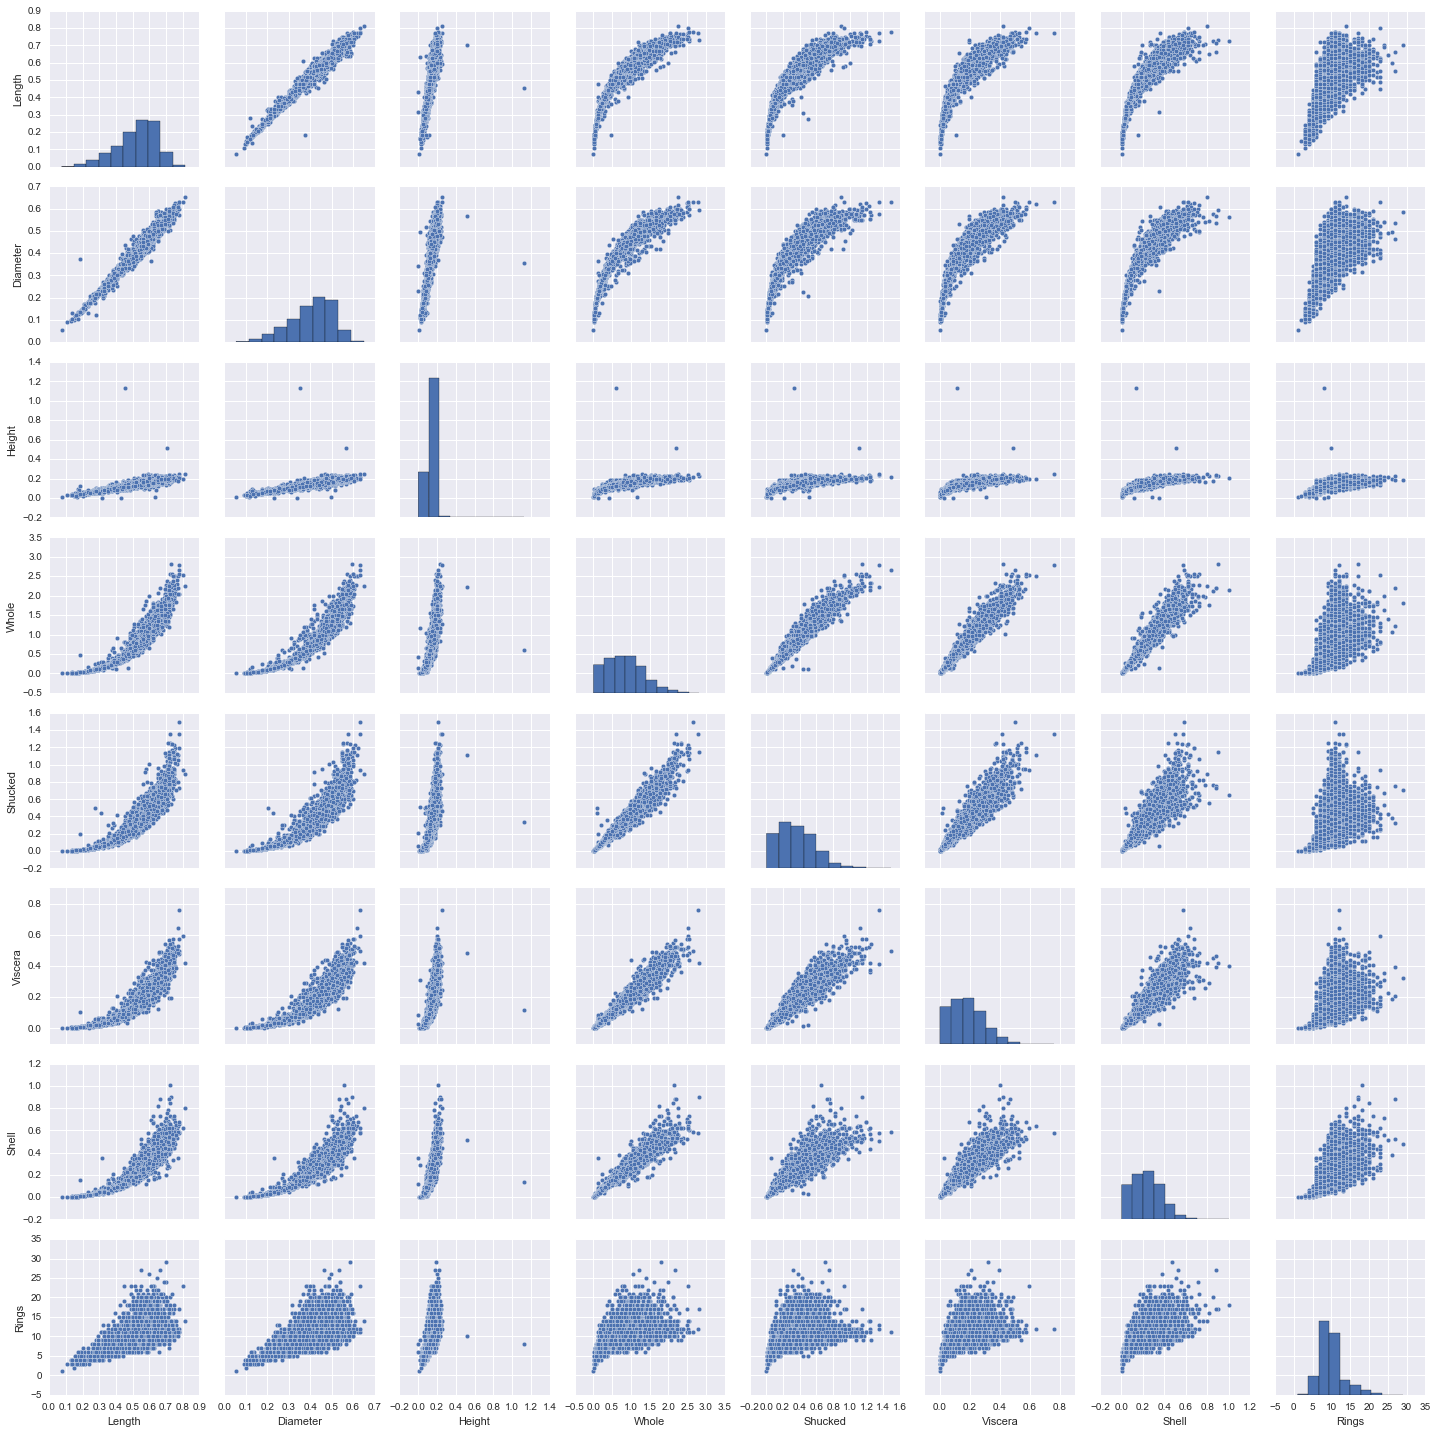

In [4]:
sns.pairplot(abalone_data)

以下は箱ひげ図です。

/Users/kunitaka/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


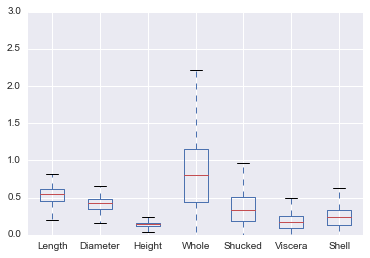

In [20]:
# Wholeが広がりがあるのがわかります。
abalone_data[["Length","Diameter","Height","Whole","Shucked","Viscera","Shell"]].boxplot()
# グリッドをつける
plt.grid(True)

基本統計量も確認しましょう。

In [8]:
abalone_data.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Heightに0などもありますが、今回はそのままモデリングを実施します。

In [25]:
# 解答

# 線形回帰モデル
from sklearn.linear_model import LinearRegression
# 決定木(回帰)
from sklearn.tree import  DecisionTreeRegressor
# k-NN
from sklearn.neighbors import  KNeighborsRegressor
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

X = abalone_data.iloc[:,1:7]
Y = abalone_data['Rings']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

for model in [LinearRegression()
             ,DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=5)
             ,RandomForestRegressor()]:
    
    clf = model.fit(X_train_std,y_train)
    
    print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
    print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

train: LinearRegression 0.517069214256
test: LinearRegression 0.53060211172
train: DecisionTreeRegressor 1.0
test: DecisionTreeRegressor 0.0218457892819
train: KNeighborsRegressor 0.635596375739
test: KNeighborsRegressor 0.459657450885
train: RandomForestRegressor 0.909899748572
test: RandomForestRegressor 0.482948831663


上記の学習データとテストデータのスコアを見比べてみればわかる通り、モデル（回帰木）によっては、過学習になっている（学習データでスコアが1、てテストデータのスコアが0.02）のかよくわかります。

次は、参考ですが、k-NNのパラメータkを変更させて検証してみましょう。以前の章でも同じような実装をしましたので、そちらを参考にしてください。

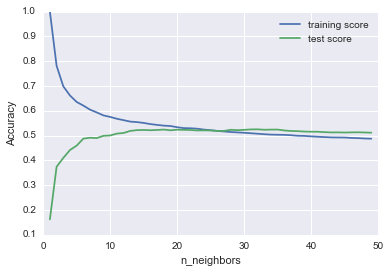

In [28]:
# 解答
# k-NN
from sklearn.neighbors import  KNeighborsRegressor

from sklearn.model_selection import train_test_split

X = abalone_data.iloc[:,1:7]
Y = abalone_data['Rings']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

training_accuracy = []
test_accuracy =[]

neighbors_settings = range(1,50)

for n_neighbors in neighbors_settings:
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train_std,y_train)
    
    training_accuracy.append(clf.score(X_train_std,y_train))
    
    test_accuracy.append(clf.score(X_test_std,y_test))
    
plt.plot(neighbors_settings, training_accuracy,label="training score")
plt.plot(neighbors_settings, test_accuracy,label="test score")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

kを増やすごとに改善しているようですが、k=25付近でスコア0.5ちょっとが限界のようです。

## 15.3 総合演習問題
キーワード：教師あり学習、分類、マーケティング分析、検証、混同行列、正解率、適合率、再現率、F1値、ROC曲線、AUC

以前に扱いました以下のデータをダウンロードして、データ（bank-full.csv）を読み込んで、後の問いに答えてください。（bank-full.csvが分析対象データになります。）

http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

(1)  数値データ(age,balance,day,duration,campaign,pdays,previous)における基本統計量(レコード数、最大最小、標準偏差など)を算出してください。  
(2)  データの"job","marital","education","default","housing","loan"のそれぞれについて、預金を申し込む人、申し込まない人の割合を算出してください。(例えばjobだったら、申し込む人の中でadminが占めている割合、blue-collorが占めている割合など)  
(3)  y(預金を申し込む人、申し込まない)を目的変数として、予測モデルを構築してください。モデルは複数（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレストなど）試してください。ただし、テスト用にデータはあらかじめ抜いてください(train_test_splitのパラメータrandom_state=0で設定してください)。     
(4)  テスト用のデータを使って、それぞれのモデルの検証をしましょう。各モデルのテストデータにおける正解率、適合率、再現率、F1値、混同行列を表示してください。どのモデルを使いますか。  
(5)  それぞれのモデルのROC曲線を引いて、AUCを算出し、比較できるようにしてください。

### **解答例**

(1)ウェブからデータを取得しています。

In [10]:
import requests, zipfile
from io import StringIO
import io

# データがあるurl の指定
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

次に、データを読み込み、どんなデータがあるか確認します。

In [26]:
banking_c_data = pd.read_csv("bank-full.csv",sep=";")
banking_c_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
# 数値データの統計量を算出します。
banking_c_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


(2)次に、yesとnoでそれぞれの割合を算出してみます。

In [29]:
col_name_list = ["job","marital","education","default","housing","loan"]
for col_name in col_name_list:
    print("---------------- "+col_name+" ----------------------")
    print(banking_c_data.groupby([col_name,"y"])["y"].count().unstack()/banking_c_data.groupby(["y"])["y"].count()*100)

---------------- job ----------------------
y                     no        yes
job                                
admin.         11.372176  11.930422
blue-collar    22.604078  13.386273
entrepreneur    3.416662   2.325581
housemaid       2.833024   2.060881
management     20.432343  24.598223
retired         4.378538   9.756098
self-employed   3.486799   3.535640
services        9.480988   6.976744
student         1.675768   5.086028
technician     16.925505  15.882019
unemployed      2.757878   3.819247
unknown         0.636241   0.642844
---------------- marital ----------------------
y                no        yes
marital                       
divorced  11.484896  11.760257
married   61.266971  52.089242
single    27.248134  36.150501
---------------- education ----------------------
y                 no        yes
education                      
primary    15.680577  11.174135
secondary  51.981364  46.322556
tertiary   28.317720  37.738703
unknown     4.020340   4.764606
-------

(3-5)ここで、説明変数を選択し、ダミー変数として変換します。（以下、補足説明を参照。）

In [37]:
banking_c_data_dummy = pd.get_dummies(banking_c_data[['job','marital','education','default','housing','loan']])
banking_c_data_dummy.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0


目的変数は「y」のため、フラグを立てます。

In [38]:
# 目的変数：flg立てをする
banking_c_data_dummy["flg"] = banking_c_data["y"].map(lambda x: 1 if x =='yes' else 0)

以下はモデリングをしています。説明変数は"age","balance","campaign"を選択します。

In [39]:
# 解答
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# データの分割（学習データとテストデータ分ける）
from sklearn.model_selection import train_test_split

# 混同行列、その他の指標
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

# 説明変数
X = pd.concat([banking_c_data_dummy.drop("flg", axis=1),banking_c_data[["age","balance","campaign"]]],axis=1)
# 目的変数
Y = banking_c_data_dummy['flg']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify = Y, random_state=0)

for model in [LogisticRegression(),LinearSVC(), 
              DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)
             ,RandomForestClassifier()]:
    
    clf = model.fit(X_train,y_train)
    pred_y = clf.predict(X_test)
    confusion_m = confusion_matrix(y_test,pred_y)
    
    print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
    print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
    print("Confution matrix:\n{}".format(confusion_m))
    print("適合率:%.3f" % precision_score(y_true=y_test,y_pred=pred_y))
    print("再現率:%.3f" % recall_score(y_true=y_test,y_pred=pred_y))
    print("F1値:%.3f" % f1_score(y_true=y_test,y_pred=pred_y))

train: LogisticRegression 0.882830010617
test: LogisticRegression 0.883128372998
Confution matrix:
[[9981    0]
 [1321    1]]
適合率:1.000
再現率:0.001
F1値:0.002
train: LinearSVC 0.881502890173
test: LinearSVC 0.881535875431
Confution matrix:
[[9964   17]
 [1322    0]]
適合率:0.000
再現率:0.000
F1値:0.000
train: DecisionTreeClassifier 0.994396602572
test: DecisionTreeClassifier 0.820578607449
Confution matrix:
[[8883 1098]
 [ 930  392]]
適合率:0.263
再現率:0.297
F1値:0.279
train: KNeighborsClassifier 0.897428335496
test: KNeighborsClassifier 0.869326727417
Confution matrix:
[[9694  287]
 [1190  132]]
適合率:0.315
再現率:0.100
F1値:0.152
train: RandomForestClassifier 0.9756989501
test: RandomForestClassifier 0.877200743166
Confution matrix:
[[9673  308]
 [1080  242]]
適合率:0.440
再現率:0.183
F1値:0.259


上の結果から、決定木、k-NN、ランダムフォレストを選ぶことにして、以下、ROC曲線とAUCを算出します。

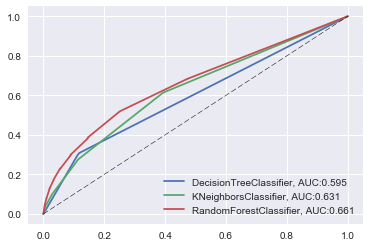

In [40]:
from sklearn.metrics import roc_curve,roc_auc_score

for model in [DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)
             ,RandomForestClassifier()]:
    
    clf = model.fit(X_train,y_train)
    method = clf.__class__.__name__ 
    fpr,tpr,thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

    plt.plot(fpr,tpr,label=method+", AUC:" + str(round(auc,3)))
    plt.legend(loc=4)

# モデルなし
plt.plot([0, 1], [0, 1],color='black', lw= 0.5, linestyle='--')

グラフの右下にそれぞれのモデルのAUCが算出されており、ランダムフォレストが一番高いです。

### 補足説明：ダミー変数と多重共線性（行列計算の数式等に慣れていない方はスキップしてください）

ここでは、ダミー変数化したものをそのまま全て代入し、モデリングしました。しかし、これは果たしてよいのでしょうか。機械学習の教師あり学習（重回帰分析）で、多重共線性について触れましたが、ダミー変数を扱う場合の注意点を述べます。以下の例を考えて、数式的に見ていきましょう。

k個の要素なら成るカテゴリカル変数をダミー変数にする際に、k個をそのままダミー変数に用いると多重共線性が発生することを以下の具体例を用いて示します。あるスーパーマーケットの1日のアイスクリームの販売個数 $y$ をその日の平均気温 $x_1$、天気 $z$(晴れ、くもり、雨の3要素)を用いて重回帰分析で予測することを考えます。

|データNo|$y$(個)|$x_1$(℃)|$z$|
|:--:|:--:|:--:|:--:|
|1|903|21|くもり|
|2|1000|27|晴れ|
|3|1112|22|雨|
|4|936|19|くもり|
|5|1021|23|晴れ|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|n|$y_n$|$x_n$|$z_n$|

天気$z$を$x_2$を晴れ、$x_3$をくもり、$x_4$を雨として、次のようにダミー変数化します。

|データNo|$y$(個)|$x_1$(℃)|$z$|$x_2$|$x_3$|$x_4$|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|1|903|21|くもり|0|1|0|
|2|1000|27|晴れ|1|0|0|
|3|1112|22|雨|0|0|1|
|4|936|19|くもり|0|1|0|
|5|1021|23|晴れ|1|0|0|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|n|$y_n$|$x_{1n}$|$z_n$|$x_{2n}$|$x_{3n}$|$x_{4n}$|

このとき、ダミー変数2つの値がわかれば、残ったダミー変数の値もわかるので、説明変数に3つ全てを含める必要はないと考えられます。実際、$x_4 = -x_2 - x_3 +1$という関係が成り立ちます。この関係から、$x_2$、$x_3$、$x_4$全てを重回帰分析の説明変数に含めると最小二乗推定値が求まらないことを示します。重回帰式$y=b_0+b_1 x_1+b_2 x_2+b_3 x_3+b_4 x_4$を考えます。訓練データを用いて

\begin{eqnarray}
\boldsymbol{y}=\left( \begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array} \right),\,\,\,
X=\left( \boldsymbol{1},\boldsymbol{x}_1,\boldsymbol{x}_2,\boldsymbol{x}_3,\boldsymbol{x}_4 \right)
=\left( \begin{array}{ccccc}
1 & x_{11} & x_{21} & x_{31} & x_{41} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{1n} & x_{2n} & x_{3n} & x_{4n}
\end{array} \right)
\end{eqnarray}

とすると、係数$b_0,b_1,\cdots ,b_4$の最小二乗推定値は

\begin{eqnarray}
\left( \begin{array}{c}
b_{0} \\
b_{1} \\
\vdots \\
b_{4}
\end{array} \right)
=({}^t\!X X)^{-1} {}^t\!X \boldsymbol{y}
\end{eqnarray}

と表されます。しかし、今回 $x_4 = -x_2 - x_3 +1$という関係から、${}^t\!X X$の行列式が0となり逆行列が存在しないことが次のように示されます。

\begin{eqnarray}
|{}^t\!X X| = \left|
    \begin{array}{cc}
        \left( \begin{array}{c}
          {}^t\!\boldsymbol{1} \\
          {}^t\!\boldsymbol{x}_1 \\
          {}^t\!\boldsymbol{x}_2 \\
          {}^t\!\boldsymbol{x}_3 \\
          {}^t\!\boldsymbol{x}_4 \\
        \end{array} \right)
        X
    \end{array}
  \right|
  =
  \left|
    \begin{array}{c}
        {}^t\!\boldsymbol{1} X \\
        {}^t\!\boldsymbol{x}_1 X \\
        {}^t\!\boldsymbol{x}_2 X \\
        {}^t\!\boldsymbol{x}_3 X \\
        {}^t\!\boldsymbol{x}_4 X \\
    \end{array}
  \right|
  =
  \left|
    \begin{array}{c}
        {}^t\!\boldsymbol{1} X \\
        {}^t\!\boldsymbol{x}_1 X \\
        {}^t\!\boldsymbol{x}_2 X \\
        {}^t\!\boldsymbol{x}_3 X \\
        {}^t\!\boldsymbol{x}_4 X +  {}^t\!\boldsymbol{x}_2 X + {}^t\!\boldsymbol{x}_3 X \\
    \end{array}
  \right|
  =
  \left|
    \begin{array}{c}
        {}^t\!\boldsymbol{1} X \\
        {}^t\!\boldsymbol{x}_1 X \\
        {}^t\!\boldsymbol{x}_2 X \\
        {}^t\!\boldsymbol{x}_3 X \\
        {}^t\!\boldsymbol{1} X \\
    \end{array}
  \right| 
  =0
\end{eqnarray}

ここで、3つ目の等号では4行目に2行目、3行目を加えても行列式は変わらないという性質を用い、4つ目の等号では$x_4 = -x_2 - x_3 +1$という関係を用いました。このように、行列式が0となり、最小二乗推定値は存在しません。よって、最小二乗推定値を求めるためにはダミー変数を1つ抜く(例えば$x_4$)必要があります。今回は要素が3つから成るカテゴリカル変数を用いましたが、一般のn個の要素からなるカテゴリカル変数でもn個全てをダミー変数に使用してしまうと同様に行列式が0となることが示せます。

重回帰分析等を実施するときには、多重共線性の問題がありますので、説明変数にカテゴリー変数を使う場合は注意しましょう。なお、pandasのダミー変数化するためのget_dummies関数には、drop_firstという最初のダミー変数を取り除くパラメータがありますので、必要があったら使ってください。

>[参考文献]

>『統計クイックリファレンス 第2版』(Sarah Boslaugh (著),黒川 利明 (翻訳),木下 哲也 (翻訳),中山 智文 (翻訳),本藤 孝 (翻訳),その他、オライリージャパン)

>[参考URL]

>http://heartland.geocities.jp/ecodata222/ed/edj1-2-1-2-1.html

## 15.4 総合演習問題
キーワード：教師あり学習、教師なし学習、ハイブリッドアプローチ

本講座の機械学習の章で扱ったload_breast_cancerを使って、さらに予測精度（正解率）を上げるモデルを作成してみましょう。同じく、テスト用にデータはあらかじめ抜いて検証してください(train_test_splitのパラメータrandom_state=0で設定してください)。   

In [42]:
# 前回の解答
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [43]:
# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test,pred_y)

print("Confution matrix:\n{}".format(confusion_m))

train: LogisticRegression 0.990610328638
test: LogisticRegression 0.958041958042
Confution matrix:
[[50  3]
 [ 3 87]]


データを標準化して、
単純にモデルを当てはめるとテストデータで正解率95.8％でした。この結果を上回ることはできるでしょうか。

### **解答例**

いろいろとアプローチがありますが、ここでは教師なし学習＋教師あり学習のハイブリッドアプローチでやってみましょう。まずは、データにクラスター分析をかけます。

クラスター数を3に設定して計算します。

In [62]:
from sklearn.cluster import KMeans

kmeans_pp = KMeans(n_clusters=3)

kmeans_pp.fit(X_train_std)

y_train_cl = kmeans_pp.fit_predict(X_train_std)

In [64]:
kmeans_pp.fit(X_test_std)
y_test_cl = kmeans_pp.fit_predict(X_test_std)

In [65]:
# 学習データ用のクラスター所属
cl_train_data = pd.DataFrame(y_train_cl,columns=["cl_nm"]).astype(str)
cl_train_data_dummy = pd.get_dummies(cl_train_data)
cl_train_data_dummy.head()

,cl_nm_0,cl_nm_1,cl_nm_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [67]:
# テストデータ用のクラスター所属
cl_test_data = pd.DataFrame(y_test_cl,columns=["cl_nm"]).astype(str)
cl_test_data_dummy = pd.get_dummies(cl_test_data)
cl_test_data_dummy.head()

,cl_nm_0,cl_nm_1,cl_nm_2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [68]:
merge_train_data = pd.concat([pd.DataFrame(X_train_std),cl_train_data_dummy,pd.DataFrame(y_train,columns=["flg"])]
                             ,axis=1)
merge_test_data = pd.concat([pd.DataFrame(X_test_std),cl_test_data_dummy,pd.DataFrame(y_test,columns=["flg"])]
                            ,axis=1)

In [69]:
merge_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,cl_nm_0,cl_nm_1,cl_nm_2,flg
0,-0.500746,-0.629604,-0.510598,-0.508655,-0.326770,-0.678037,-0.702917,-0.673290,-0.323201,-0.513532,...,-0.654538,-0.449967,-0.494471,-0.429224,-0.465020,-0.447715,0.0,1.0,0.0,1
1,0.948356,0.011070,0.931367,0.814498,-0.473158,0.297845,0.191520,0.649428,-1.114571,-1.117685,...,0.245581,0.565426,0.387699,1.175397,0.053685,-0.302163,1.0,0.0,0.0,0
2,-1.005023,-0.151387,-1.005709,-0.884654,0.755356,-0.706644,-0.840513,-0.798055,-1.203323,0.466252,...,0.386088,-0.964424,-0.915127,-0.748055,-1.142683,-0.316267,0.0,1.0,0.0,1
3,-1.634260,0.326831,-1.551415,-1.243587,-0.159571,0.500562,0.556308,-0.699663,1.533191,2.838587,...,1.338897,1.138476,1.303103,-0.546019,0.712943,3.642956,0.0,0.0,1.0,1
4,-0.254149,-0.789772,-0.314642,-0.325885,-0.801097,-0.976997,-1.115819,-1.166748,-0.648624,-0.542097,...,-0.865298,-0.769974,-1.272052,-1.350424,-0.409803,-0.009932,0.0,1.0,0.0,1


次に、主成分分析をかけてどの要素数がスコアが良いか計算してみます。

In [70]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
X_train_data = merge_train_data.drop("flg", axis=1)
X_test_data = merge_test_data.drop("flg", axis=1)

y_train_data = merge_train_data["flg"]
y_test_data = merge_test_data["flg"]

# PCA
from sklearn.decomposition import PCA

best_score = 0
best_num = 0

for num_com in range(15):
    pca = PCA(n_components=num_com+1)
    pca.fit(X_train_data)
    X_train_pca = pca.transform(X_train_data)
    X_test_pca = pca.transform(X_test_data)

    logistic_model = model.fit(X_train_pca,y_train_data)
    
    train_score = logistic_model.score(X_train_pca,y_train_data)
    test_score = logistic_model.score(X_test_pca,y_test_data)
    
    
    if best_score < test_score:
        best_score = test_score
        best_num = num_com+1
        
print("best score:",best_score)
print("best num componets:",best_num)

best score: 0.965034965035
best num componets: 8


クラスター分析＋主成分分析の結果を利用して、正解率96.5％に改善しました。単に精度を上げるためだけではなく、マーケティング分析でも、教師なし学習＋教師あり学習のアプローチは応用されることもあります。具体的には、教師なしのクラスター分析を使って、それぞれのセグメントの特性がわかった後に、各セグメントがどれくらいの割合で（ある商品を）購入する人、しない人がいるのか予測したい時に教師あり学習を使ったります。これらのアプローチについては他にもいろいろとアイデアが考えられると思いますので、データ分析をする時に検討ください。

## 15.5 総合演習問題
キーワード：時系列データ、欠損データの補完、シフト、ヒストグラム、教師あり学習

以下のように、2001年1月2日から2016年12月30日までの為替データ（USD/JPYとEUR/USD）を読み込み、以下の問いに答えてください。

(1)読み込んだデータには、祝日や休日等のため、欠損（NaN）があります。その補完処理をするために、直近の前の日におけるデータで補完してください。ただし年月のデータがない場合もありますので、その場合、今回は無視してください（改めて日付データを作成して、分析をすることも可能ですが、今回はこのアプローチはとりません。）。  
(2)上記のデータで、各統計量の確認と時系列のグラフ化をしてください。  
(3)当日と前日における差分をとり、それぞれの変化率（当日-前日）/前日のデータをヒストグラムで表示してください。　　  
(4)将来の価格（例：次の日）を予測するモデルを構築してみましょう。具体的には、2016年11月を訓練データとして、当日の価格を目的変数として、前日、前々日、3日前の価格データを使ってモデル（線形回帰）を構築し、2016年12月をテストデータとして、検証してください。また、他の月や年で実施すると、どんな結果になりますか。  

**pip install pandas-datareaderで、モジュールをあらかじめダウンロードしてください。jupyterの右上にあるterminalで実行できます。**

In [72]:
import pandas_datareader.data as pdr

start_date = "2001/1/2"
end_date = "2016/12/30"

fx_jpusdata = pdr.DataReader("DEXJPUS","fred",start_date,end_date)
fx_useudata = pdr.DataReader("DEXUSEU","fred",start_date,end_date)

### **解答例**

先ほど読み込んんだデータにはnaがありますので、fillnaを使って前の値（ffillをパラメータとして設定）で埋めることにします。

In [74]:
fx_jpusdata_full = fx_jpusdata.fillna(method="ffill")
fx_useudata_full = fx_useudata.fillna(method="ffill")

それぞれの基本統計量を確認します。

In [154]:
print(fx_jpusdata_full.describe())
print(fx_useudata_full.describe())

           DEXJPUS
count  4174.000000
mean    105.775220
std      14.612526
min      75.720000
25%      95.365000
50%     108.105000
75%     118.195000
max     134.770000
           DEXUSEU
count  4174.000000
mean      1.239633
std       0.165265
min       0.837000
25%       1.128100
50%       1.274700
75%       1.352575
max       1.601000


時系列のデータですので、グラフにしてみましょう。

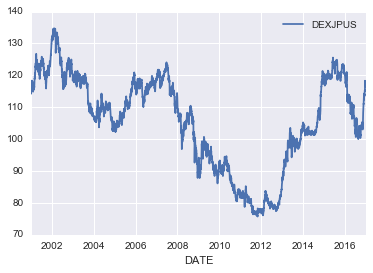

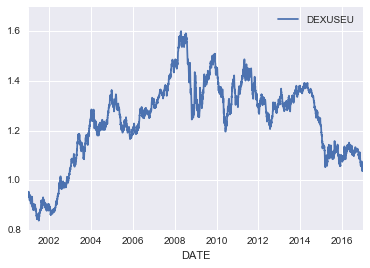

In [155]:
fx_jpusdata_full.plot()
fx_useudata_full.plot()

それぞれのグラフに特徴があるようです。

次に、前日の値との比をとって、それぞれヒストグラムにしてみましょう。

In [160]:
fx_jpusdata_full_r = (fx_jpusdata_full - fx_jpusdata_full.shift(1))/fx_jpusdata_full.shift(1)
fx_useudata_full_r = (fx_useudata_full - fx_useudata_full.shift(1))/fx_useudata_full.shift(1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x181bcacc0>]], dtype=object)

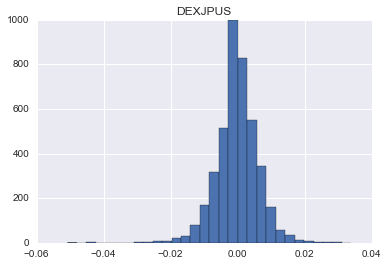

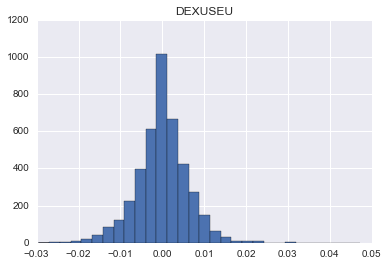

In [169]:
fx_jpusdata_full_r.hist(bins=30)
fx_useudata_full_r.hist(bins=30)

次に、前日だけではなく、2日前、3日前の値とも比べるため、そのデータセットを作成しましょう。

In [179]:
merge_data_jpusdata = pd.concat([fx_jpusdata_full
                                 ,fx_jpusdata_full.shift(1)
                                 ,fx_jpusdata_full.shift(2)
                                ,fx_jpusdata_full.shift(3)]
                                ,axis=1)
merge_data_jpusdata.columns =["today","pre_1","pre_2","pre_3"]
merge_data_jpusdata_nona = merge_data_jpusdata.dropna()
merge_data_jpusdata_nona.head()

,today,pre_1,pre_2,pre_3
DATE,,,,
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26
2001-01-09,116.64,115.97,116.19,115.47
2001-01-10,116.26,116.64,115.97,116.19
2001-01-11,117.56,116.26,116.64,115.97


それでは、早速、モデリングしてみましょう。

In [249]:
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

# モデル
from sklearn import linear_model

# モデルのインスタンス
l_model = linear_model.LinearRegression()

pre_term = "2016-11"
pos_term = "2016-12"
        
for pre_list in (["pre_1"],["pre_1","pre_2"],["pre_1","pre_2","pre_3"]):

    print(pre_list)
    train = merge_data_jpusdata_nona[pre_term]
    X_train = pd.DataFrame(train[pre_list])
    y_train = train["today"]

    test = merge_data_jpusdata_nona[pos_term]
    X_test = pd.DataFrame(test[pre_list])
    y_test = test["today"]
    
    # モデルのあてはめ
    clf = l_model.fit(X_train,y_train)
    print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
    print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

['pre_1']
train: LinearRegression 0.949302769217
test: LinearRegression 0.568785224204
['pre_1', 'pre_2']
train: LinearRegression 0.949402065484
test: LinearRegression 0.562702901642
['pre_1', 'pre_2', 'pre_3']
train: LinearRegression 0.950929954565
test: LinearRegression 0.540438952077


上記の結果より、訓練データとテストデータに大きな乖離があり、オーバーフィットになっているようです。他にも適合率や再現率等も見てください。為替のデータや金融商品の価格予測は困難だといわれており、機械学習以外にも様々なアプローチや研究がされています。

## 15.6 総合演習問題
キーワード：時系列データ、回帰分析

以下のデータを取得し、読み込んで以下の問いに答えてください。ただし、今回は2000年より前のデータ(1987~1999)を分析対象とします。

http://stat-computing.org/dataexpo/2009/the-data.html


**注：なお、現在のilectでは、たくさんのユーザーさんに使っていただくために、環境に制限等があります。ので、以下のコード(Python)はilectではメモリーエラー等になってしまいますが、ある程度のスペックPCであればローカルで実行できますので、参考にしてください。ただし、必要な情報のみ抽出して計算するなどしていけば、実行可能だと思いますので、やってみてください。**

(1)データを読み込んだ後は、年×月の平均遅延時間を算出してください。何かわかることはありますか。  
(2)(1)で算出したデータについて、1月から12月までの結果を時系列の折れ線グラフにしてください。その時、年ごとに比較できるように、１つのグラフにまとめてください。（なので、1987年から1999年までのデータについて、それぞれの時系列グラフが並ぶイメージです。）  
(3)各航空会社（UniqueCarrier）ごとの平均遅延時間を算出してください。また、出発地(Origin)、目的地(Dest)を軸にして、平均遅延時間を算出してください。  
(4)遅延時間を予測するための予測モデルを構築します。目的変数をDepDelay、説明変数をArrDelayとDistanceにして、モデルを構築しましょう。

### **解答**

データの取得は、以下のスクリプトを参考に、実装と実行をしてください。ただし、以下を実行する場合は別ファイルとして、「ファイル名.sh」の形式で保存し、そのファイルをここで実行する場合は、「bash ファイル名.sh」で実行します。もしくは、terminalに移動し、専用のディレクトリなどを作って、スクリプトを実行して、データを取得してください。他、Pythonから取得する方法もありますし、以前はzipを展開してデータを読み込んでいましたが、zipのまま加工できるプログラムも書けますので、ぜひ調べてやってみてください。** なおdataのダウンロードにとても時間がかかりますので、注意しましょう。**

(1)以下の実装は、データが取得できたとして、該当のパスから、規則性のあるファイル名を探し出し、それらのデータをマージしています。なお、glob関数は、Unixシェルの規則を使ってファイル名等のパターンマッチをします。

In [19]:
# pathを入力
path =r'/Users/kunitaka/chapter11/' 


# データをマージするための処理
import glob
import pandas as pd


allFiles = glob.glob(path + "/19*.csv")
data_frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    print(file_)
    df = pd.read_csv(file_,index_col=None, header=0,encoding ="ISO-8859-1" )
    list_.append(df)
frame_19 = pd.concat(list_)

/Users/kunitaka/chapter11/1987.csv
/Users/kunitaka/chapter11/1988.csv
/Users/kunitaka/chapter11/1989.csv


6,000万行以上で、6-7Gほどあります。データのチェックです。

In [4]:
frame_19.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


次は、月別のレコード数を見てみましょう。

In [151]:
frame_19.groupby("Month")["Month"].count()

Month
1     5296105
2     4843866
3     5347270
4     5163501
5     5287710
6     5216540
7     5386157
8     5439069
9     5179039
10    5829477
11    5524978
12    5735800
Name: Month, dtype: int64

遅延はDepDelayのため、平均を月ごとに見ると以下になります。

In [ ]:
frame_19.groupby("Month")["DepDelay"].mean()

(2)遅延を年別、月別推移をグラフで見てみましょう。どうなるでしょうか？

In [156]:
year_month_avg_arrdelay = frame_19.groupby(["Year","Month"])["ArrDelay"].mean()

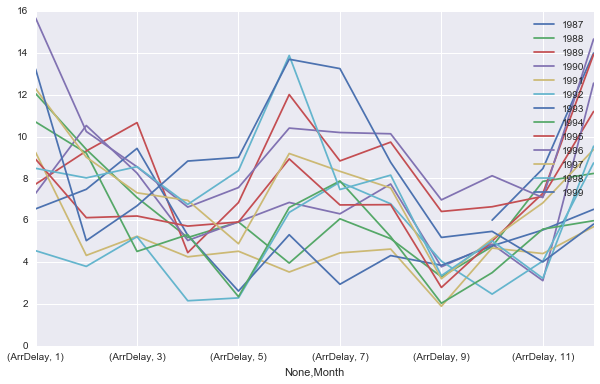

In [185]:
pd.DataFrame(year_month_avg_arrdelay).unstack().T.plot(figsize=(10,6))
plt.legend(loc="best")
plt.grid(True)

毎年12月や1月にピークが来ています。年末年始に遅れが生じるのは、感覚的にも理解できます。また6月にもピークが来ています。遅延時間は季節性があるようです。

ここでは実施しませんが、異常値等のチェックもしましょう。最大値が極端に大きかったり、最小値が極端に小さい時もあるようです。

(3)次に空港会社によって（UniqueCarrier）、ArrDelayに違いはあるのでしょうか。

In [189]:
frame_19.groupby(["UniqueCarrier"])["ArrDelay"].mean()

UniqueCarrier
AA         6.106294
AS         8.480363
CO         6.940598
DL         8.007069
EA         7.102668
HP         8.015950
ML (1)     4.747609
NW         5.037018
PA (1)     5.434067
PI        10.464421
PS         9.261881
TW         6.864240
UA         8.129607
US         6.730249
WN         5.733285
Name: ArrDelay, dtype: float64

PI航空会社の遅延が目立っています。

次は、出発地や目的地による違いです。かなりばらつきがあるようです。

In [55]:
origin_avg_arrdelay = pd.DataFrame(frame_19.groupby(["Origin"])["ArrDelay"].mean()).reset_index()
origin_avg_arrdelay.head()

,Origin,ArrDelay
0,ABE,4.137663
1,ABI,NaN
2,ABQ,5.476970
3,ACK,22.723881
4,ACV,24.472067


In [56]:
dest_avg_arrdelay = pd.DataFrame(frame_19.groupby(["Dest"])["ArrDelay"].mean()).reset_index()
dest_avg_arrdelay.head()

,Dest,ArrDelay
0,ABE,6.900649
1,ABI,NaN
2,ABQ,6.339433
3,ACK,26.930233
4,ACV,22.814286


(4)次は、遅延時間を予測するための簡単なモデルを作成します。

In [14]:
analysis_data = frame_19[["DepDelay","Distance","ArrDelay"]]

今回、NAは分析対象から外します。（本講座でも述べましたが、実務では、このような欠損データ等はどのように扱うかはきちんと確認、議論した上で進めてください。）

In [15]:
analysis_data_full = analysis_data.dropna()

In [16]:
X = analysis_data_full[["DepDelay","Distance"]]
Y = analysis_data_full["ArrDelay"]

In [19]:
# データの分割（学習データとテストデータ分ける）
from sklearn.model_selection import train_test_split

# モデル
from sklearn import linear_model

# モデルのインスタンス
l_model = linear_model.LinearRegression()

# 学習データとテストデータ分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,random_state=0)

# モデルのあてはめ
clf = l_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
 
# 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )

# 切片 
print(clf.intercept_)

train: LinearRegression 0.664045634578
test: LinearRegression 0.659922960276
   Coefficients      Name
1     -0.000781  Distance
0      0.865896  DepDelay
0.94241150424


>[参考文献]

>『Rによるハイパフォーマンスコンピューティング』（福島 真太朗  (著)、ソシム株式会社）

他、Spark(Pyspark)でも計算できると思いますので、余裕があればやってみてください。